# Create the Hybrid Catalgoue

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyoorb as oo

In [2]:
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

%config InlineBackend.figure_format = "retina"

## Get the original catalgoues

In [5]:
def get_catalogues(s3m_path="../catalogues/propagated/s3m.h5",
                   mpcorb_path="../catalogues/propagated/mpcorb.h5"):
    
    s3m = pd.read_hdf(s3m_path, key="df")
    mpcorb = pd.read_hdf(mpcorb_path, key="df")
    return s3m, mpcorb

In [214]:
s3m, mpcorb = get_catalogues()
mpcorb.i = np.rad2deg(mpcorb.i)
mpcorb.argperi = np.rad2deg(mpcorb.argperi)
mpcorb.Omega = np.rad2deg(mpcorb.Omega)

## Make a list of things to delete and combine catalogues

In [3]:
delete_these = []

In [4]:
H_bins = np.arange(-2, 28 + 1)
for left, right in zip(H_bins[:-1], H_bins[1:]):
    matched = np.load("output/matched_{}_{}.npy".format(left, right))
    delete_these.extend(matched)

In [14]:
remaining_s3m = s3m.drop(delete_these, axis=0)

In [215]:
hybrid = pd.concat([remaining_s3m, mpcorb[mpcorb.H < 35]])

In [77]:
hybrid

,id,q,e,i,Omega,argperi,t_p,coords,t_0,time_type,H,g,des
0,0.0,1.251459,0.382244,9.304721,252.063850,185.610748,3.399577e+06,2.0,59639.0,3.0,10.315,0.15,S0000001a
1,1.0,1.286219,0.662518,18.303865,132.486568,80.463153,3.443786e+06,2.0,59639.0,3.0,10.818,0.15,S0000002a
2,2.0,0.617193,0.645272,10.302493,67.484378,182.131418,3.412079e+06,2.0,59639.0,3.0,11.175,0.15,S0000003a
3,3.0,0.383306,0.856419,16.988463,117.793282,242.430598,3.423601e+06,2.0,59639.0,3.0,11.452,0.15,S0000004a
4,4.0,0.569264,0.772125,22.761089,314.323204,73.119299,3.428828e+06,2.0,59639.0,3.0,11.678,0.15,S0000005a
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134445,1134445.0,42.551975,0.012956,0.239964,3.469132,0.002127,3.398149e+06,2.0,59639.0,3.0,7.900,0.15,1134445
1134446,1134446.0,35.869432,0.085654,0.297754,0.230373,3.229325,3.398152e+06,2.0,59639.0,3.0,8.500,0.15,1134446
1134447,1134447.0,41.573625,0.013471,0.008748,2.284132,1.182615,3.398150e+06,2.0,59639.0,3.0,8.100,0.15,1134447
1134448,1134448.0,1.555372,0.280549,0.476275,2.112416,1.707711,3.402219e+06,2.0,59639.0,3.0,18.900,0.15,1134448


# Compare CDFs of S3m and Hybrid

In [177]:
hybrid_col = plt.get_cmap("viridis")(0.3)
s3m_col = plt.get_cmap("viridis")(0.7)

H done
q done
e done
i done
argperi done
Omega done
t_p done


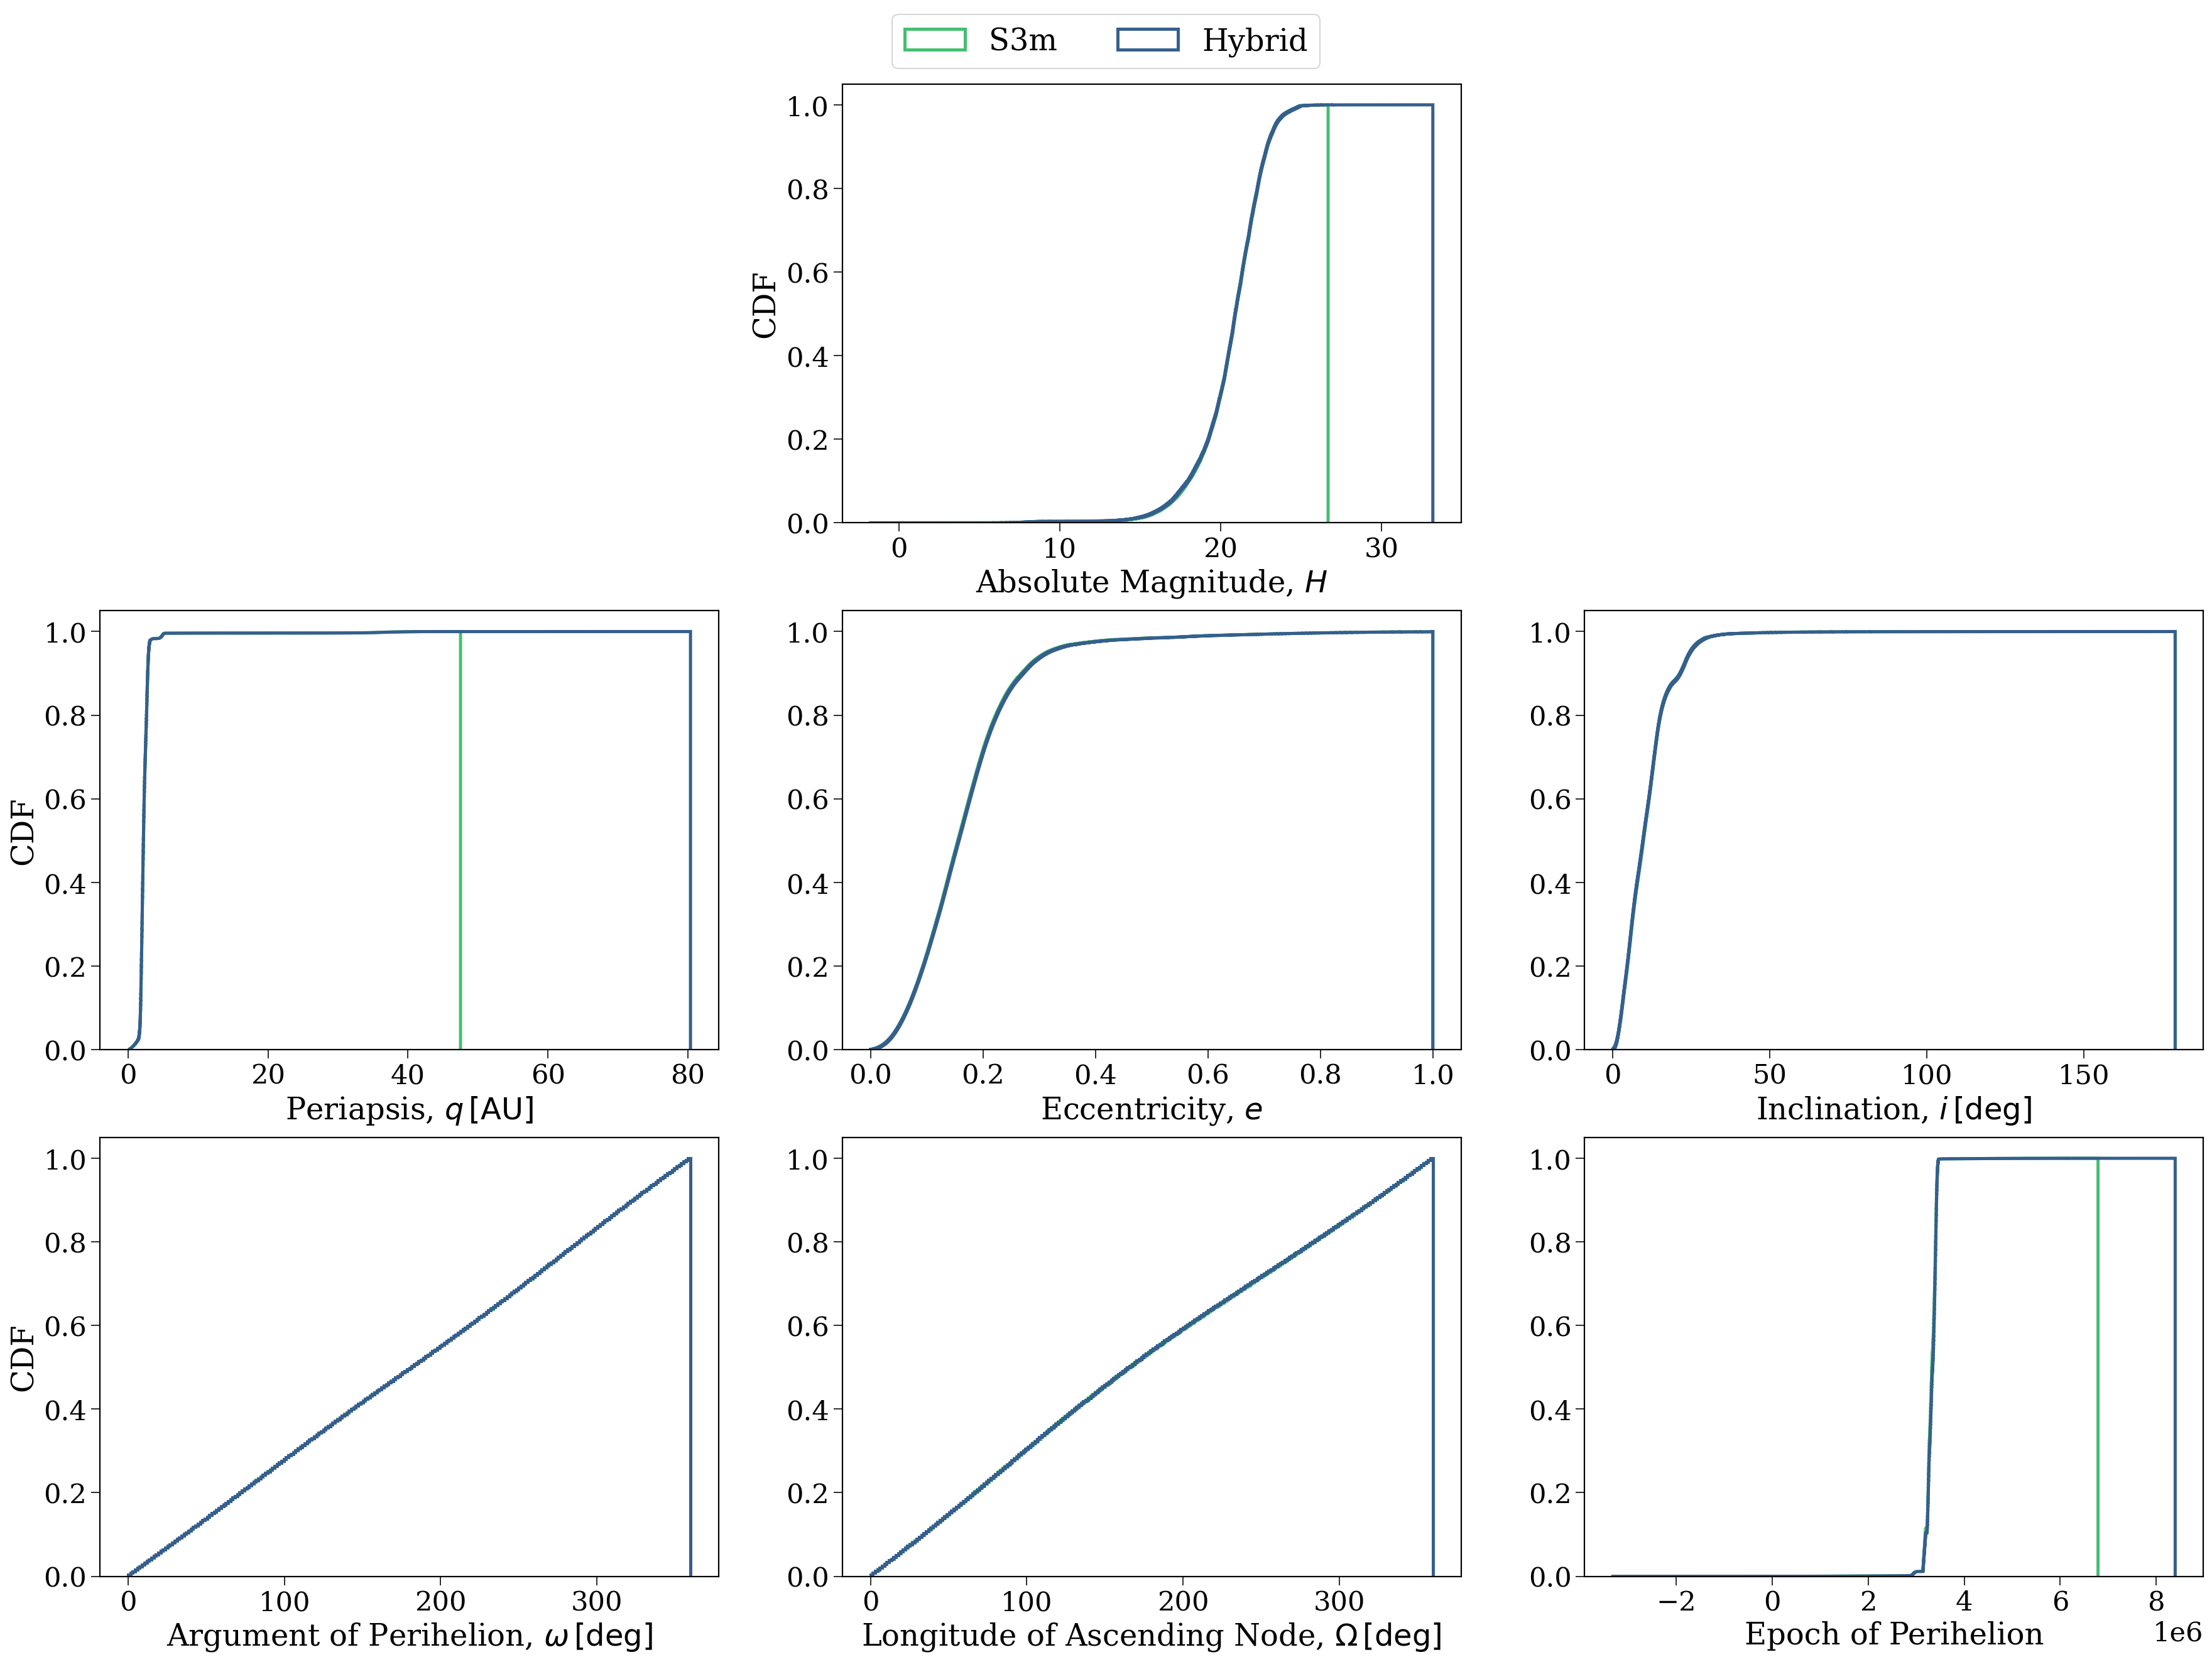

In [216]:
variables = ["H", "q", "e", "i", "argperi", "Omega", "t_p"]
labels = [r"Absolute Magnitude, $H$", r"Periapsis, $q \, [\rm AU]$", r"Eccentricity, $e$",
          r"Inclination, $i \, [\rm deg]$", r"Argument of Perihelion, $\omega \, [\rm deg]$",
          r"Longitude of Ascending Node, $\Omega \, [\rm deg]$", r"Epoch of Perihelion"]

fig, axes = plt.subplots(3, 3, figsize=(30, 20))
flat_axes = np.concatenate([[axes.flatten()[1]], axes.flatten()[3:]])

for ax, var, label in zip(flat_axes, variables, labels):
    ax.hist(s3m[var], bins="fd", cumulative=True, density=True, histtype="step",
            lw=2.5, color=s3m_col, label="S3m")
    ax.hist(hybrid[var], bins="fd", cumulative=True, density=True, histtype="step",
            lw=2.5, color=hybrid_col, label="Hybrid")
    ax.set_xlabel(label)
    print(var, "done")
    
handles, labels = axes[0, 1].get_legend_handles_labels()
    
fig.subplots_adjust(top=0.95)
fig.legend(handles=handles, labels=labels, ncol=2, loc="upper center")
    
for ax in [axes[0, 1], axes[1, 0], axes[2, 0]]:
    ax.set_ylabel("CDF")
    
for ax in [axes[0, 0], axes[0, 2]]:
    ax.axis("off")
    
plt.show()

H done
q done
e done
i done
argperi done
Omega done
t_p done


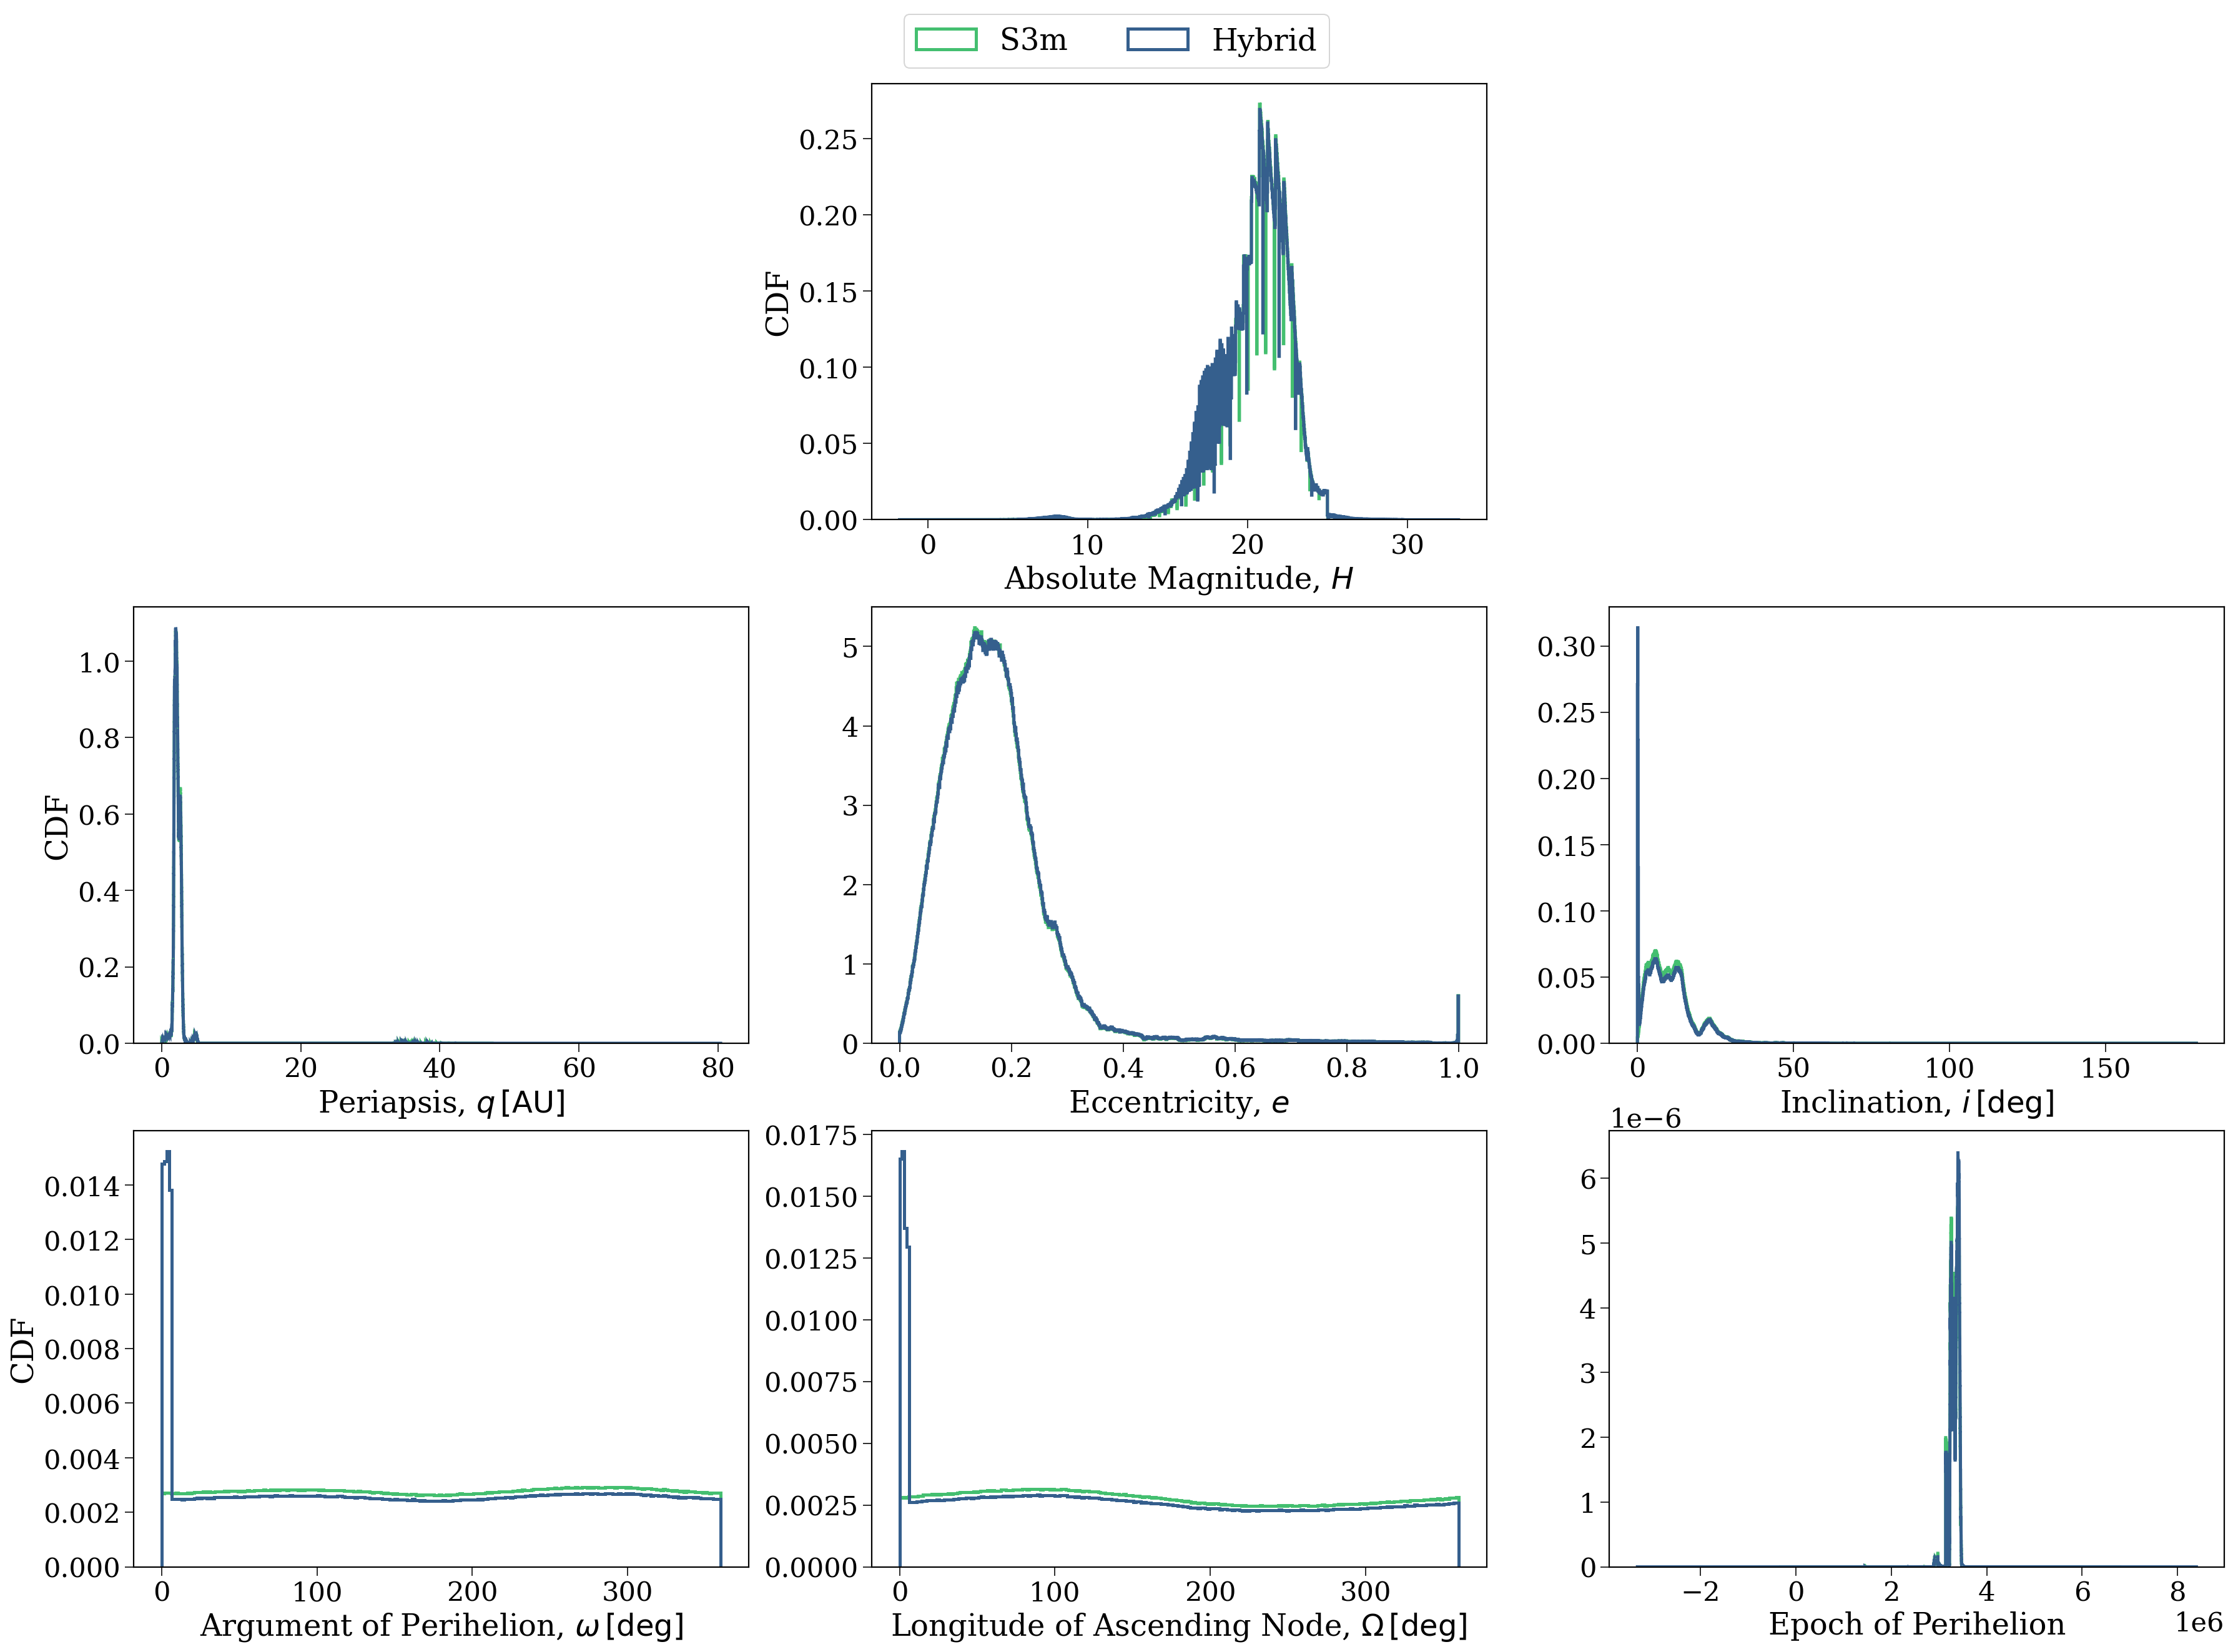

In [209]:
variables = ["H", "q", "e", "i", "argperi", "Omega", "t_p"]
labels = [r"Absolute Magnitude, $H$", r"Periapsis, $q \, [\rm AU]$", r"Eccentricity, $e$",
          r"Inclination, $i \, [\rm deg]$", r"Argument of Perihelion, $\omega \, [\rm deg]$",
          r"Longitude of Ascending Node, $\Omega \, [\rm deg]$", r"Epoch of Perihelion"]

fig, axes = plt.subplots(3, 3, figsize=(30, 20))
flat_axes = np.concatenate([[axes.flatten()[1]], axes.flatten()[3:]])

for ax, var, label in zip(flat_axes, variables, labels):
    ax.hist(s3m[var], bins="fd", cumulative=False, density=True, histtype="step",
            lw=2.5, color=s3m_col, label="S3m")
    ax.hist(hybrid[var], bins="fd", cumulative=False, density=True, histtype="step",
            lw=2.5, color=hybrid_col, label="Hybrid")
    ax.set_xlabel(label)
    print(var, "done")
    
handles, labels = axes[0, 1].get_legend_handles_labels()
    
fig.subplots_adjust(top=0.95)
fig.legend(handles=handles, labels=labels, ncol=2, loc="upper center")
    
for ax in [axes[0, 1], axes[1, 0], axes[2, 0]]:
    ax.set_ylabel("CDF")
    
for ax in [axes[0, 0], axes[0, 2]]:
    ax.axis("off")
    
plt.show()

# Various scatter plot comparisons

In [180]:
scatter_hybrid = np.random.choice(np.arange(len(hybrid)).astype(int), replace=False, size=1000000)
scatter_s3m = np.random.choice(np.arange(len(s3m)).astype(int), replace=False, size=1000000)

## $q$ vs. $e$

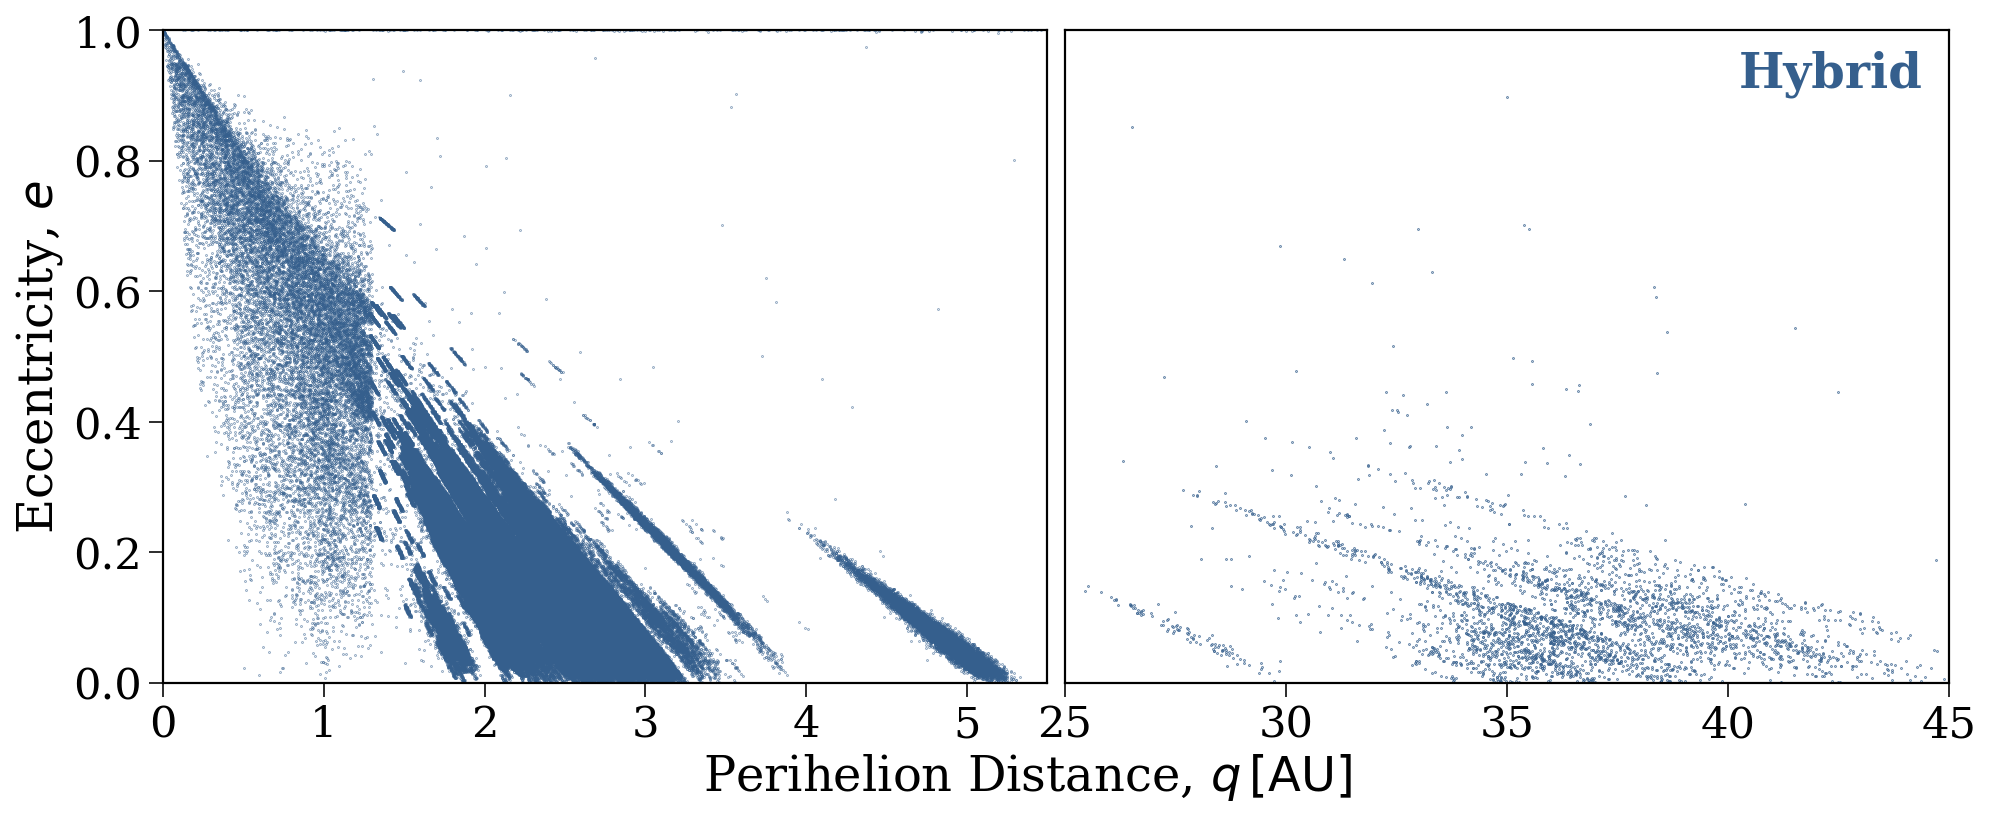

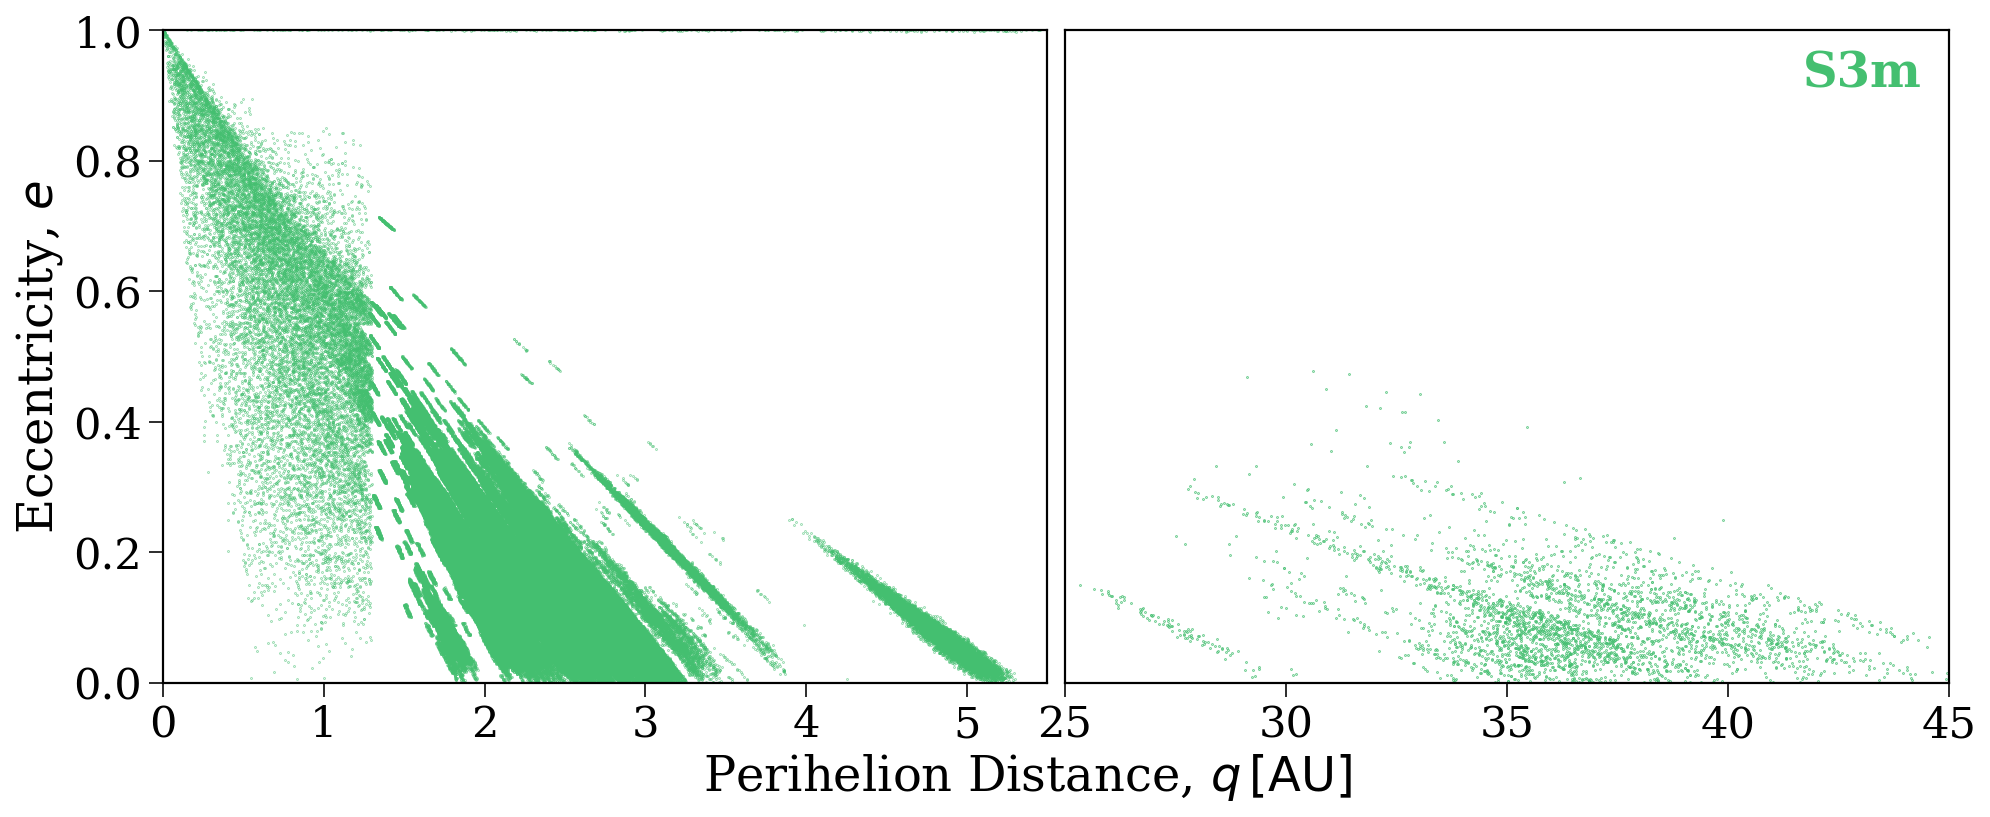

In [182]:
for df, subset, col, label in zip([hybrid, s3m], [scatter_hybrid, scatter_s3m],
                                  [hybrid_col, s3m_col], ["Hybrid", "S3m"]):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    fig.subplots_adjust(wspace=0.02)

    axes[0].scatter(df["q"].values[subset], df["e"].values[subset], s=0.05, color=col)
    axes[0].set_xlim(0, 5.5)
    axes[0].set_ylabel(r"Eccentricity, $e$")

    axes[1].scatter(df["q"].values[subset], df["e"].values[subset], s=0.1, color=col)
    axes[1].set_xlim(25, 45)
    axes[1].set_yticks([])
    
    axes[1].annotate(label, xy=(0.97, 0.97), ha="right", va="top", xycoords="axes fraction",
                     fontsize=fs, color=col, weight="bold")

    fig.text(0.5, 0, r"Perihelion Distance, $q \, [\rm AU]$", ha='center', fontsize=fs)

    for ax in axes:
        ax.set_ylim(0, 1)

    plt.show()

## $a$ vs. $e$

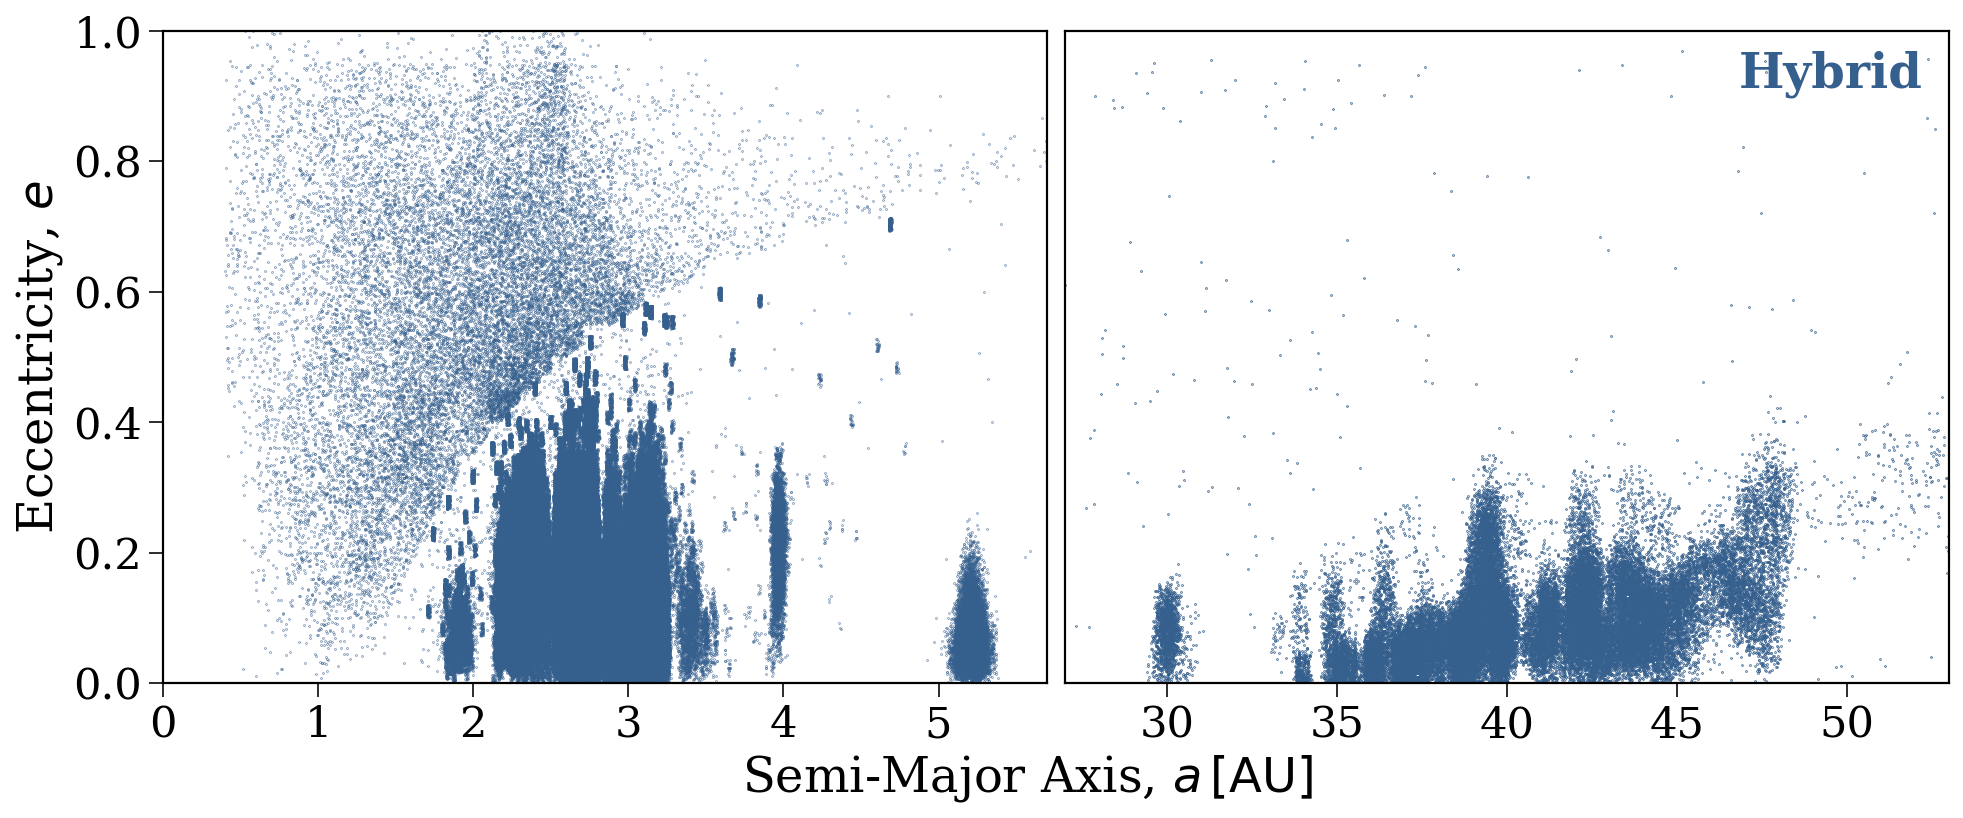

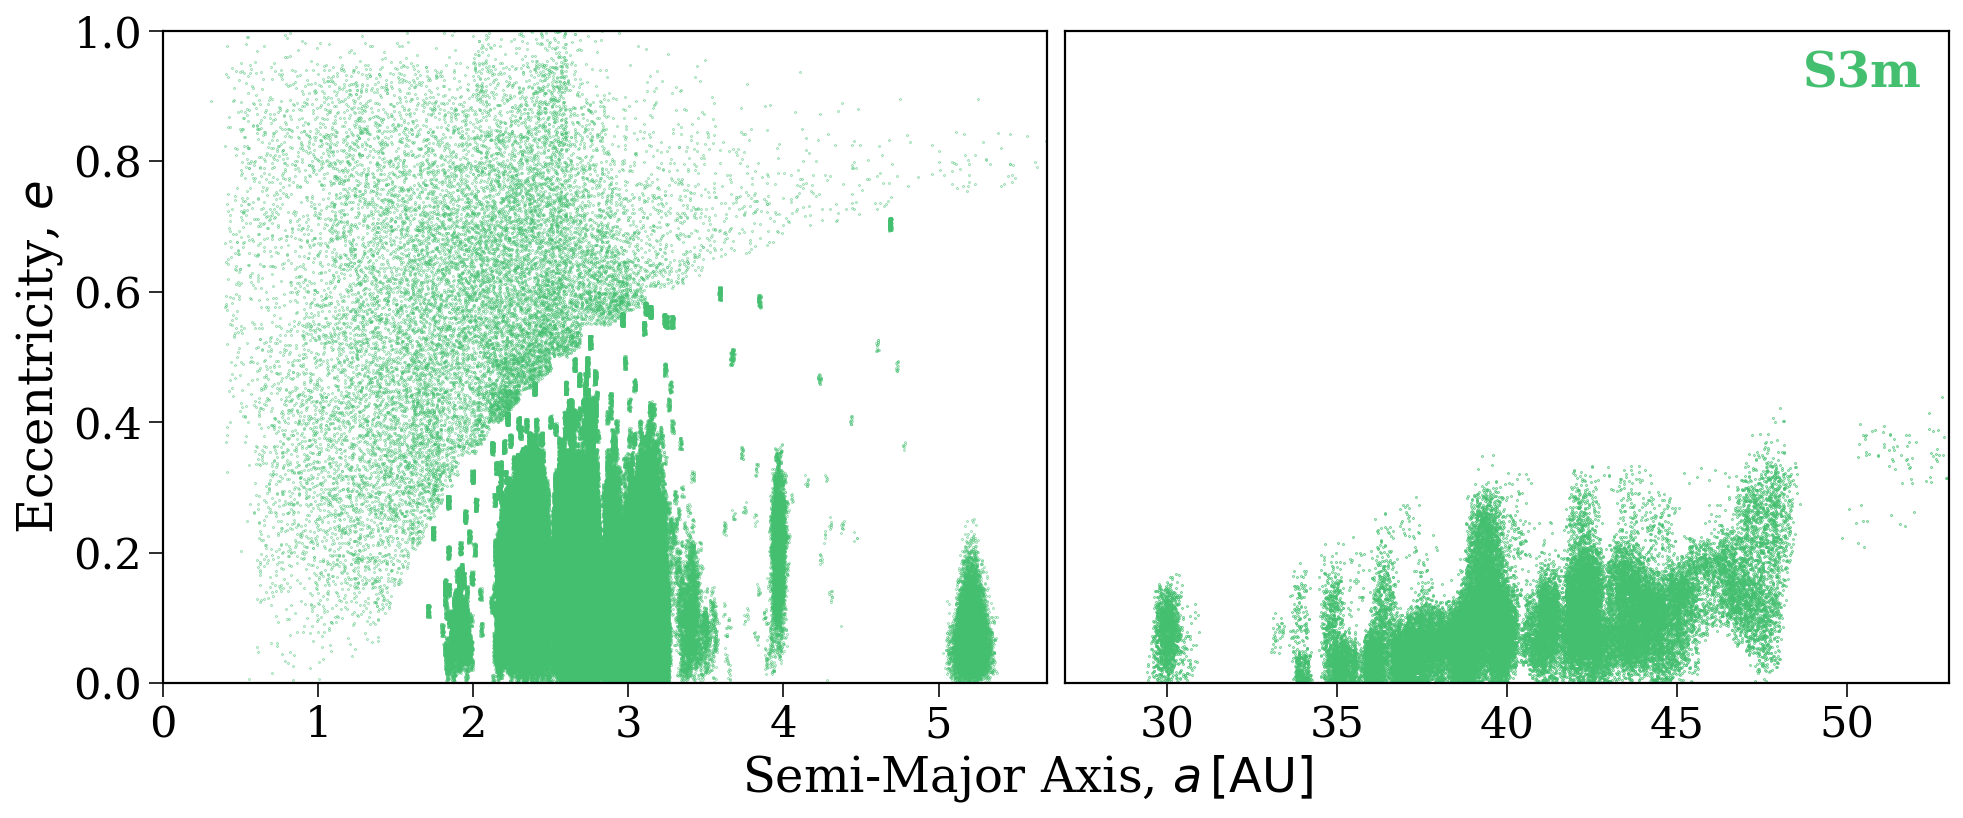

In [194]:
for df, subset, col, label in zip([hybrid, s3m], [scatter_hybrid, scatter_s3m],
                                  [hybrid_col, s3m_col], ["Hybrid", "S3m"]):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    fig.subplots_adjust(wspace=0.02)
    
    a = df["q"].values / (1 - df["e"].values)

    axes[0].scatter(a[subset], df["e"].values[subset], s=0.05, color=col)
    axes[0].set_xlim(0, 5.7)
    axes[0].set_ylabel(r"Eccentricity, $e$")

    axes[1].scatter(a[a >= 27], df["e"].values[a >= 27], s=0.1, color=col)
    axes[1].set_xlim(27, 53)
    axes[1].set_yticks([])
    
    axes[1].annotate(label, xy=(0.97, 0.97), ha="right", va="top", xycoords="axes fraction",
                     fontsize=fs, color=col, weight="bold")

    fig.text(0.5, 0, r"Semi-Major Axis, $a \, [\rm AU]$", ha='center', fontsize=fs)

    for ax in axes:
        ax.set_ylim(0, 1)

    plt.show()

## $a$ vs. $H$

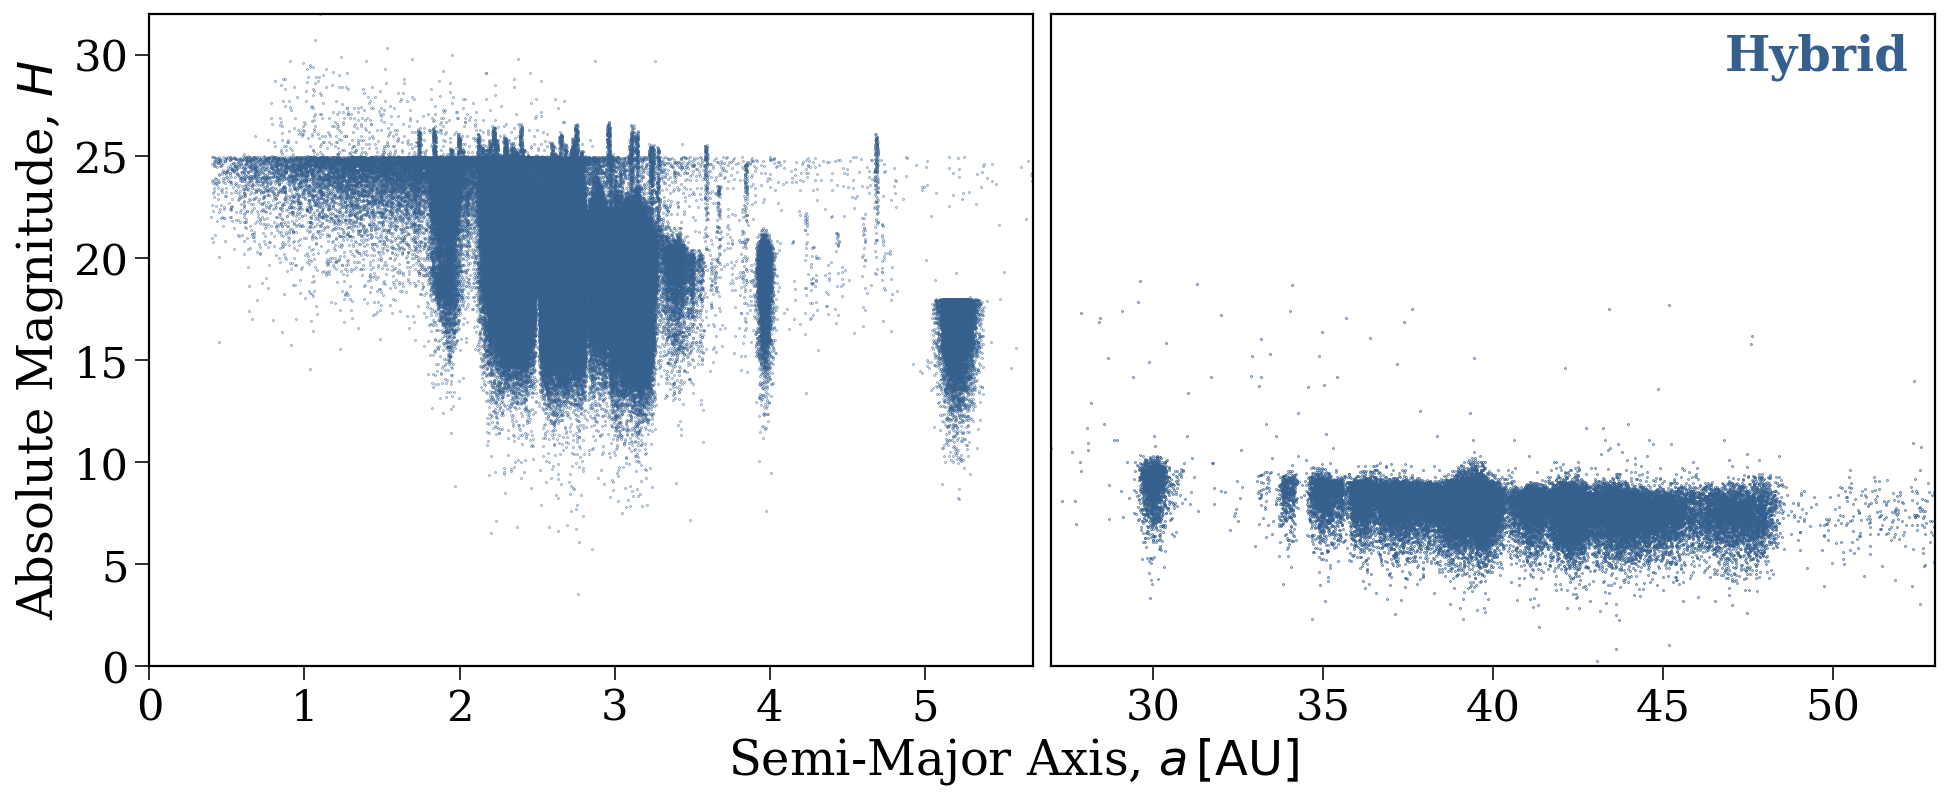

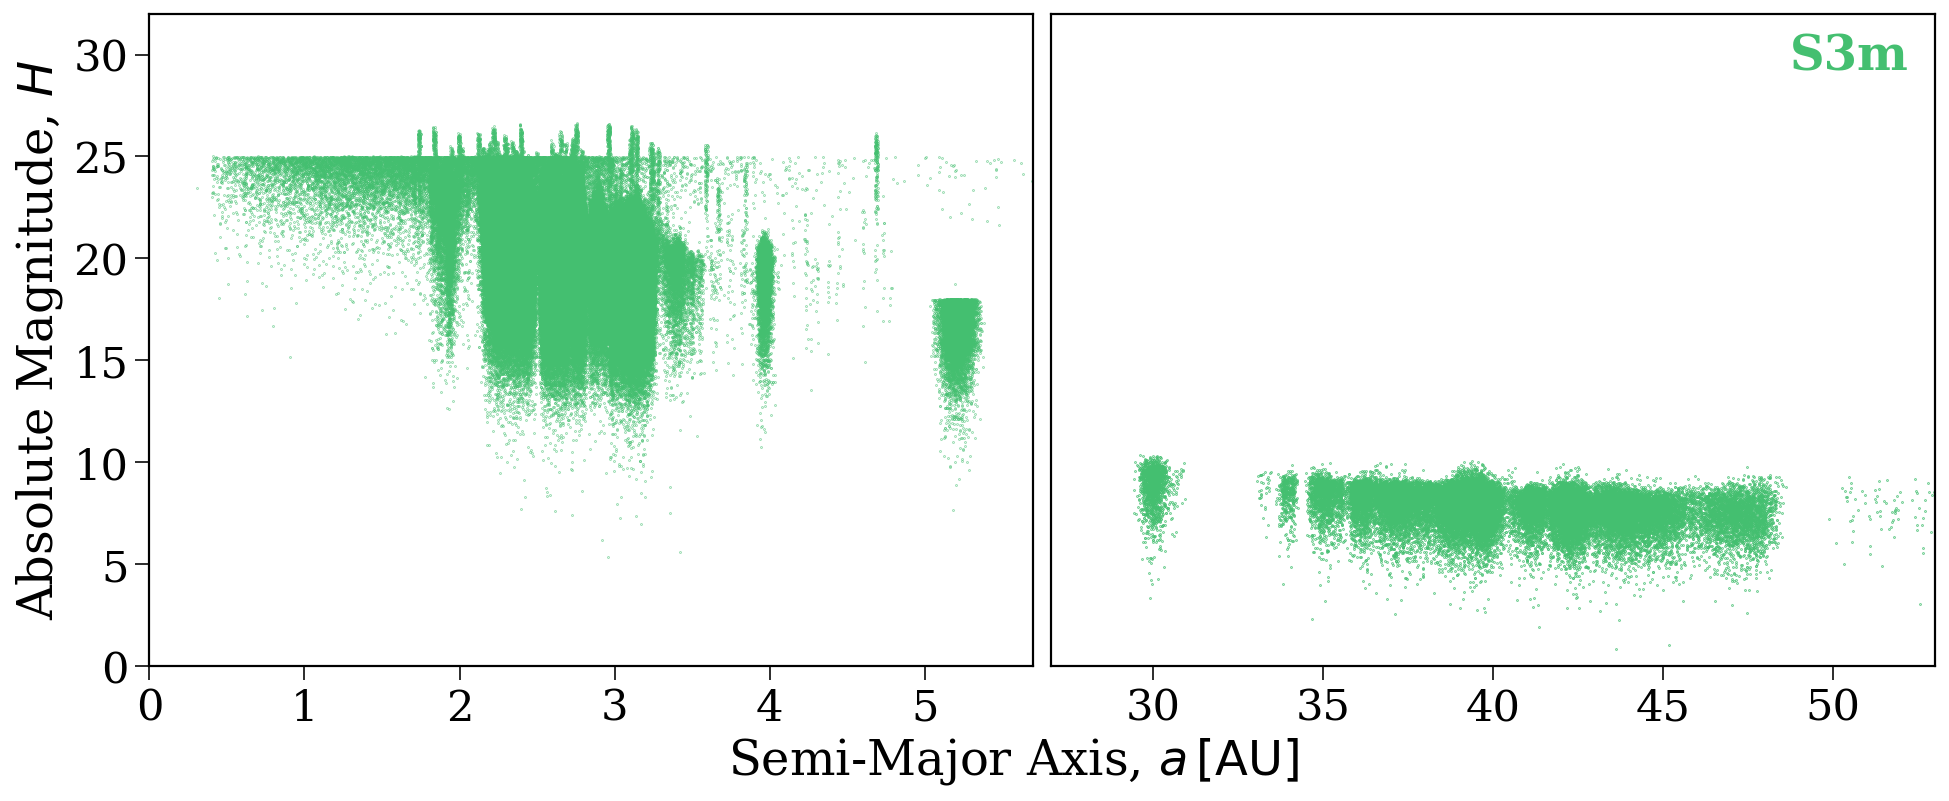

In [196]:
for df, subset, col, label in zip([hybrid, s3m], [scatter_hybrid, scatter_s3m],
                                  [hybrid_col, s3m_col], ["Hybrid", "S3m"]):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    fig.subplots_adjust(wspace=0.02)
    
    a = df["q"].values / (1 - df["e"].values)

    axes[0].scatter(a[subset], df["H"].values[subset], s=0.05, color=col)
    axes[0].set_xlim(0, 5.7)
    axes[0].set_ylabel(r"Absolute Magnitude, $H$")

    axes[1].scatter(a[a >= 27], df["H"].values[a >= 27], s=0.1, color=col)
    axes[1].set_xlim(27, 53)
    axes[1].set_yticks([])
    
    axes[1].annotate(label, xy=(0.97, 0.97), ha="right", va="top", xycoords="axes fraction",
                     fontsize=fs, color=col, weight="bold")

    fig.text(0.5, 0, r"Semi-Major Axis, $a \, [\rm AU]$", ha='center', fontsize=fs)

    for ax in axes:
        ax.set_ylim(0, 32)

    plt.show()

## $a$ vs. $H$

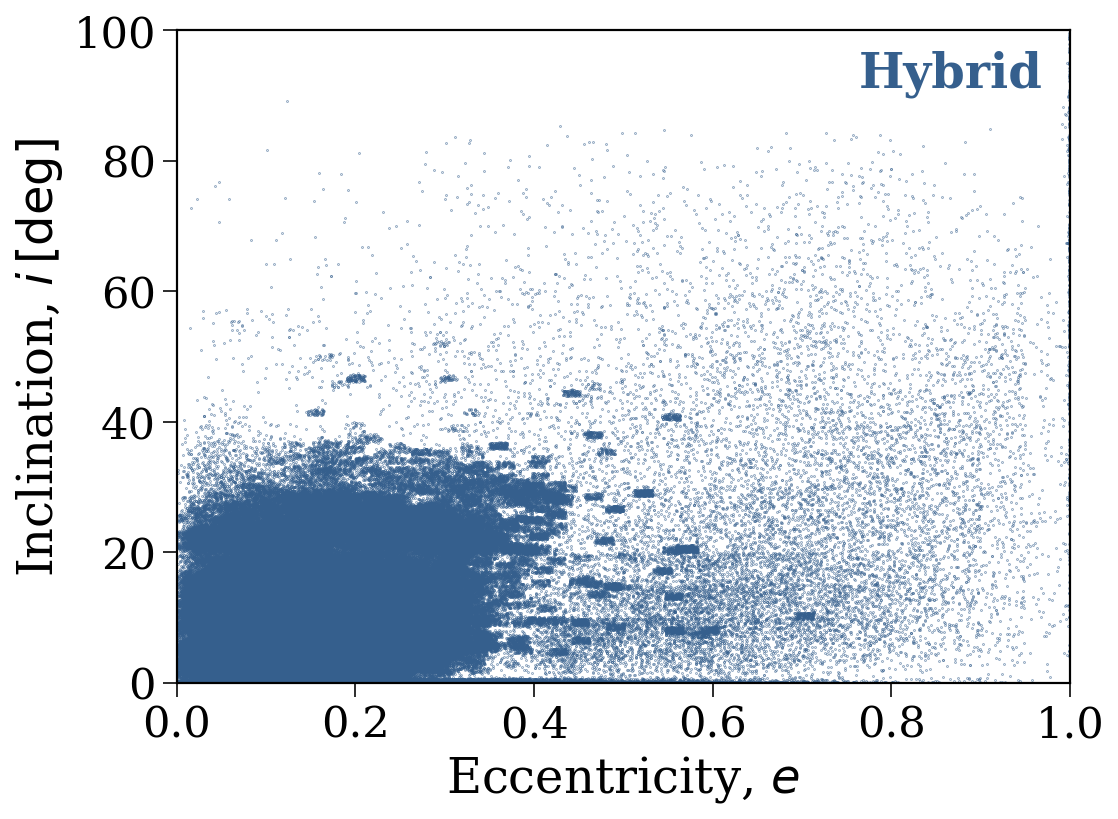

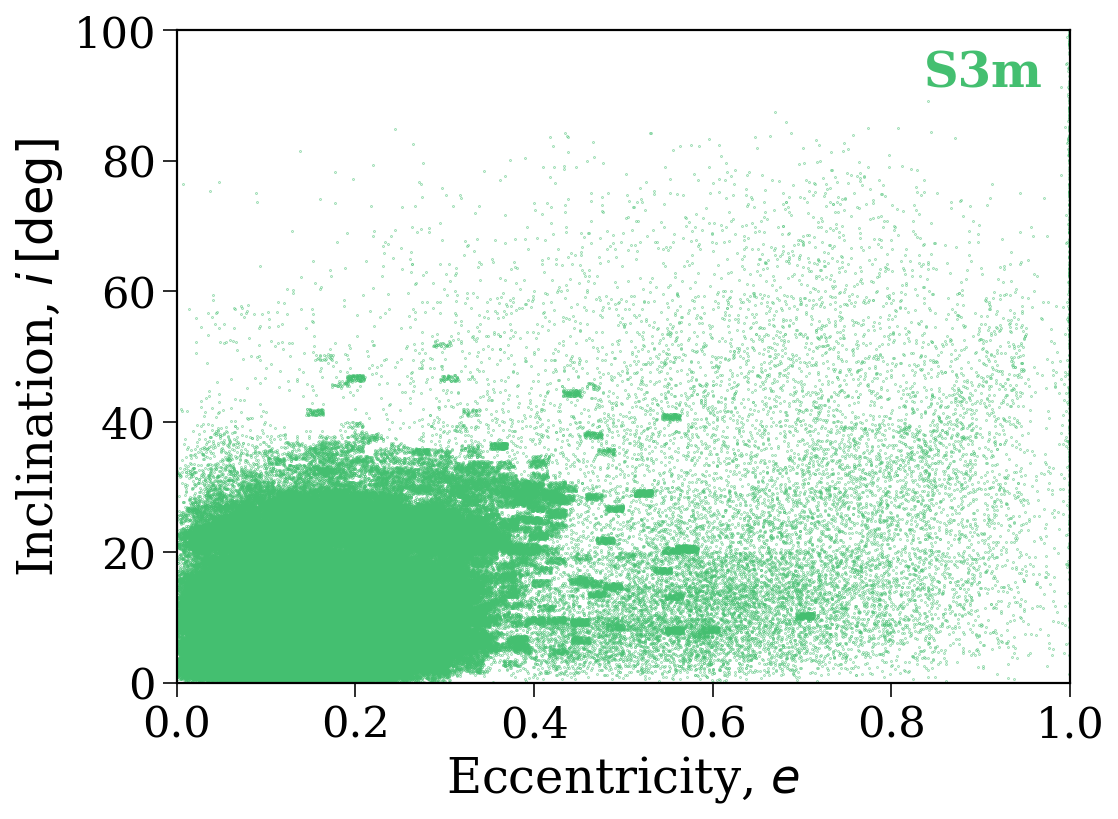

In [203]:
for df, subset, col, label in zip([hybrid, s3m], [scatter_hybrid, scatter_s3m],
                                  [hybrid_col, s3m_col], ["Hybrid", "S3m"]):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    a = df["q"].values / (1 - df["e"].values)

    ax.scatter(df["e"].values[subset], df["i"].values[subset], s=0.05, color=col)
    ax.set_xlim(0, 1)
    ax.set_xlabel(r"Eccentricity, $e$")
    ax.set_ylabel(r"Inclination, $i \, [\rm deg]$")
    
    ax.annotate(label, xy=(0.97, 0.97), ha="right", va="top", xycoords="axes fraction",
                     fontsize=fs, color=col, weight="bold")

    ax.set_ylim(0, 100)

    plt.show()